In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

可视化数据我们可以像列表一样手动索引数据集:training_data[index]  
我们使用matplotlib来可视化训练数据中的一些样本  

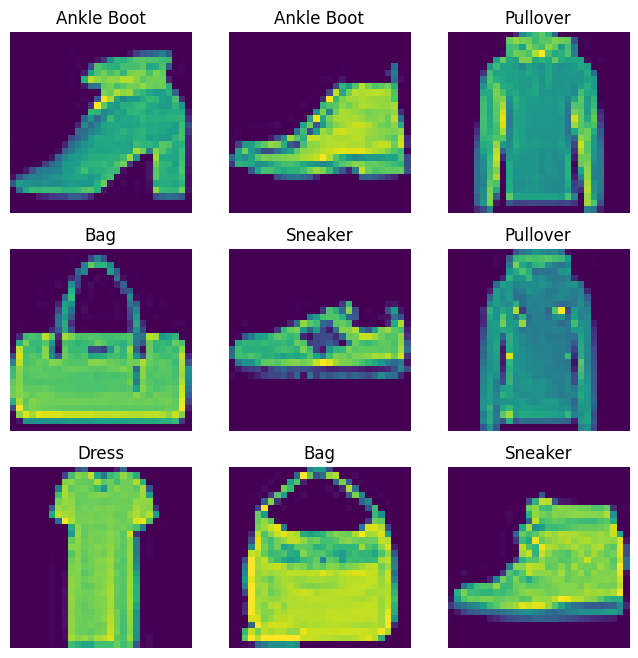

In [17]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

为文件创建自定义数据集  
自定义数据集类必须实现三个函数:init_，_len_和_getitem_。取看看这个实现;  
FashionMNIST图像存储在目录img_dir中，和它们的标签分别存储在一个CSV文件annotations file中  
在下一节中，我们将分解这些函数中发生的事情。

In [18]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    '''
    init_function在实例化Dataset对象时运行一次。
    我们初始化包含图像、注释文件和两个转换(下一节将详细介绍)的目录。
    '''
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    #返回样本数量
    def __len__(self):
        return len(self.img_labels)
    
    """
    getitem函数,从给定索引idx处的数据集中加载并返回一个样本。
    基于索引,它识别图像在磁盘上的位置,
    使用read_image将其转换为tensor,从csv数据中检索相应的标签
    Img_labels,调用它们的变换函数(如果适用)，并在元组中返回张量图像和相应的标签。
    """
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

在训练模型时，我们通常希望以“小批量”的方式传递样本，在每个epoch重新洗牌数据以减少模型过拟合，并使用Python的多处理来加速数据检索。  
DataLoader是一个可迭代对象，它用一个简单的api为我们抽象了这种复杂性。 

In [19]:
from torch.utils.data import DataLoader

# 最后一个参数表示，每次迭代时，是否打乱数据顺序
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


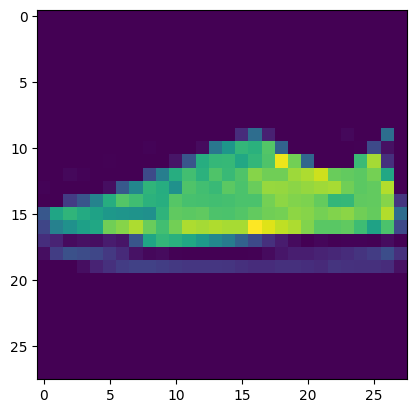

Label: 7


In [20]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")